<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%203/Python/Lab3_Econometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometrics Analysis in Python

## Load Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, t
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf

## Load Data

In [ ]:
# URL of the .dta file
data_file = "https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%203/data/database_angrist_levy_09.dta"

# Load the .dta file into a dataFrame
data = pd.read_stata(data_file)

In [ ]:
# Structure of the dataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12188 entries, 0 to 12187
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   treated     12188 non-null  int8   
 1   pair        12188 non-null  int8   
 2   m_ahim      12188 non-null  int8   
 3   boy         12188 non-null  int8   
 4   ole5        12188 non-null  int8   
 5   educav      12188 non-null  int8   
 6   educem      12188 non-null  int8   
 7   zakaibag    12188 non-null  int8   
 8   lagscore    12188 non-null  float32
 9   semrel      12188 non-null  int8   
 10  semarab     12188 non-null  int8   
 11  att18       12188 non-null  int8   
 12  att20       12188 non-null  int8   
 13  att22       12188 non-null  int8   
 14  att24       12188 non-null  int8   
 15  awr18       12188 non-null  int8   
 16  awr20       12188 non-null  int8   
 17  awr22       12188 non-null  int8   
 18  awr24       12188 non-null  int8   
 19  achv_math   12188 non-nul

In [ ]:
# Summary statistics for the DataFrame
data.describe()

,treated,pair,m_ahim,boy,ole5,educav,educem,zakaibag,lagscore,semrel,...,_Ipair_12,_Ipair_13,_Ipair_14,_Ipair_15,_Ipair_16,_Ipair_17,_Ipair_18,_Ipair_19,_Ipair_20,panel
count,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,...,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000
mean,0.505579,10.743190,3.694700,0.514194,0.063423,10.053495,9.958484,0.258615,52.068264,0.113883,...,0.015753,0.053659,0.064654,0.080571,0.044306,0.018625,0.088612,0.042337,0.070971,1.023712
std,0.499989,6.180886,2.576904,0.499819,0.243732,3.070640,3.223175,0.437892,29.511818,0.317682,...,0.124524,0.225353,0.245924,0.272186,0.205782,0.135202,0.284194,0.201364,0.256788,0.828245
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,2.000000,0.000000,0.000000,8.000000,8.000000,0.000000,36.187500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,11.000000,3.000000,1.000000,0.000000,10.000000,10.000000,0.000000,61.166668,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,16.000000,5.000000,1.000000,0.000000,12.000000,12.000000,1.000000,74.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,20.000000,22.000000,1.000000,1.000000,25.000000,25.000000,1.000000,100.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# Table 1- Descriptive Statistics

In [ ]:
# Create the summary table
summary_table = pd.DataFrame({
    "Variable": [
        "Bagrut rate",
        "Arab school",
        "Religious school",
        "Father's education",
        "Mother's education",
        "Number of siblings",
        "Immigrant",
        "Lagged Bagrut"
    ],
    "All_Mean": [
        data.loc[data['panel'] == 1, 'zakaibag'].mean(skipna=True),  # Bagrut rate
        data.loc[data['panel'] == 1, 'semarab'].mean(skipna=True),  # Arab school
        data.loc[data['panel'] == 1, 'semrel'].mean(skipna=True),   # Religious school
        data.loc[data['panel'] == 1, 'educav'].mean(skipna=True),   # Father's education
        data.loc[data['panel'] == 1, 'educem'].mean(skipna=True),   # Mother's education
        data.loc[data['panel'] == 1, 'm_ahim'].mean(skipna=True),   # Number of siblings
        data.loc[data['panel'] == 1, 'ole5'].mean(skipna=True),     # Immigrant
        data.loc[data['panel'] == 1, 'lagscore'].mean(skipna=True)  # Lagged Bagrut
    ],
    "Boys_Mean": [
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'zakaibag'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'semarab'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'semrel'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'educav'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'educem'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'm_ahim'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'ole5'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 1), 'lagscore'].mean(skipna=True)
    ],
    "Girls_Mean": [
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'zakaibag'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'semarab'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'semrel'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'educav'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'educem'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'm_ahim'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'ole5'].mean(skipna=True),
        data.loc[(data['panel'] == 1) & (data['boy'] == 0), 'lagscore'].mean(skipna=True)
    ]
})

# Display the summary table
summary_table

,Variable,All_Mean,Boys_Mean,Girls_Mean
0,Bagrut rate,0.242607,0.200000,0.287480
1,Arab school,0.348076,0.374490,0.320258
2,Religious school,0.115153,0.084184,0.147770
3,Father's education,10.070139,9.818878,10.334766
4,Mother's education,10.017796,9.866837,10.176787
5,Number of siblings,3.742214,3.650510,3.838796
6,Immigrant,0.063596,0.028571,0.100484
7,Lagged Bagrut,53.119659,52.062256,54.233307


In [ ]:
# t-test to compare the means of semrel and semarab

# Separate the groups
group_semrel = data.loc[data['panel'] == 1, 'semrel'].dropna()
group_semarab = data.loc[data['panel'] == 1, 'semarab'].dropna()

# Perform the two-sample t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(group_semrel, group_semarab, equal_var=False)

# Calculate confidence interval for the difference in means
mean_group_semrel = group_semrel.mean()
mean_group_semarab = group_semarab.mean()
mean_diff = mean_group_semrel - mean_group_semarab
std_error = np.sqrt(group_semrel.var(ddof=1) / len(group_semrel) + group_semarab.var(ddof=1) / len(group_semarab))
df = len(group_semrel) + len(group_semarab) - 2
t_crit = t.ppf(0.975, df)  # Two-tailed test at 95% confidence level
ci_lower = mean_diff - t_crit * std_error
ci_upper = mean_diff + t_crit * std_error

# Hypotheses
null_hypothesis = "The means of the two groups are equal (mean_semrel = mean_semarab)."
alternative_hypothesis = "The means of the two groups are not equal (mean_semrel ≠ mean_semarab)."

# Decision rule (alpha = 0.05)
alpha = 0.05
decision = "Reject the null hypothesis" if p_value < alpha else "Fail to reject the null hypothesis"

# Display the results
print("Two-Sample T-Test:")
print(f"Hypotheses:")
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"\nResults:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Confidence Interval: [{ci_lower:.8f}, {ci_upper:.8f}]")
print(f"Mean in Group semrel: {mean_group_semrel:.7f}")
print(f"Mean in Group semarab: {mean_group_semarab:.7f}")
print(f"\nDecision: {decision}")

Two-Sample T-Test:
Hypotheses:
Null Hypothesis: The means of the two groups are equal (mean_semrel = mean_semarab).
Alternative Hypothesis: The means of the two groups are not equal (mean_semrel ≠ mean_semarab).

Results:
T-Statistic: -25.1056
P-Value: 0.0000
Confidence Interval: [-0.25111024, -0.21473640]
Mean in Group semrel: 0.1151531
Mean in Group semarab: 0.3480764

Decision: Reject the null hypothesis


In [ ]:
# t-test to compare the means of the treated variable across the groups defined by semarab

# Separate the groups based on `semarab`
treated_semarab_0 = data.loc[(data['panel'] == 1) & (data['semarab'] == 0), 'treated'].dropna()
treated_semarab_1 = data.loc[(data['panel'] == 1) & (data['semarab'] == 1), 'treated'].dropna()

# Perform the two-sample t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(treated_semarab_0, treated_semarab_1, equal_var=False)

# Calculate confidence interval for the difference in means
mean_group_0 = treated_semarab_0.mean()
mean_group_1 = treated_semarab_1.mean()
mean_diff = mean_group_0 - mean_group_1
std_error = np.sqrt(
    treated_semarab_0.var(ddof=1) / len(treated_semarab_0) +
    treated_semarab_1.var(ddof=1) / len(treated_semarab_1)
)
df = len(treated_semarab_0) + len(treated_semarab_1) - 2
t_crit = t.ppf(0.975, df)  # Two-tailed test at 95% confidence level
ci_lower = mean_diff - t_crit * std_error
ci_upper = mean_diff + t_crit * std_error

# Hypotheses
null_hypothesis = "The means of the `treated` variable are equal across `semarab` groups."
alternative_hypothesis = "The means of the `treated` variable are not equal across `semarab` groups."

# Decision rule (alpha = 0.05)
alpha = 0.05
decision = "Reject the null hypothesis" if p_value < alpha else "Fail to reject the null hypothesis"

# Display the results
print("Two-Sample T-Test:")
print(f"Hypotheses:")
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"\nResults:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Confidence Interval: [{ci_lower:.8f}, {ci_upper:.8f}]")
print(f"Mean in Group semarab=0: {mean_group_0:.7f}")
print(f"Mean in Group semarab=1: {mean_group_1:.7f}")
print(f"\nDecision: {decision}")


Two-Sample T-Test:
Hypotheses:
Null Hypothesis: The means of the `treated` variable are equal across `semarab` groups.
Alternative Hypothesis: The means of the `treated` variable are not equal across `semarab` groups.

Results:
T-Statistic: 2.1747
P-Value: 0.0297
Confidence Interval: [0.00363542, 0.07019729]
Mean in Group semarab=0: 0.5218788
Mean in Group semarab=1: 0.4849624

Decision: Reject the null hypothesis


In [ ]:
# t-test to compare the means of the treated variable across the groups defined by semrel

# Separate the groups based on `semrel`
treated_semrel_0 = data.loc[(data['panel'] == 1) & (data['semrel'] == 0), 'treated'].dropna()
treated_semrel_1 = data.loc[(data['panel'] == 1) & (data['semrel'] == 1), 'treated'].dropna()

# Perform the two-sample t-test (Welch's t-test for unequal variances)
t_stat, p_value = ttest_ind(treated_semrel_0, treated_semrel_1, equal_var=False)

# Calculate confidence interval for the difference in means
mean_group_0 = treated_semrel_0.mean()
mean_group_1 = treated_semrel_1.mean()
mean_diff = mean_group_0 - mean_group_1
std_error = np.sqrt(
    treated_semrel_0.var(ddof=1) / len(treated_semrel_0) +
    treated_semrel_1.var(ddof=1) / len(treated_semrel_1)
)
df = len(treated_semrel_0) + len(treated_semrel_1) - 2
t_crit = t.ppf(0.975, df)  # Two-tailed test at 95% confidence level
ci_lower = mean_diff - t_crit * std_error
ci_upper = mean_diff + t_crit * std_error

# Hypotheses
null_hypothesis = "The means of the `treated` variable are equal across `semrel` groups."
alternative_hypothesis = "The means of the `treated` variable are not equal across `semrel` groups."

# Decision rule (alpha = 0.05)
alpha = 0.05
decision = "Reject the null hypothesis" if p_value < alpha else "Fail to reject the null hypothesis"

# Display the results
print("Two-Sample T-Test:")
print(f"Hypotheses:")
print(f"Null Hypothesis: {null_hypothesis}")
print(f"Alternative Hypothesis: {alternative_hypothesis}")
print(f"\nResults:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Confidence Interval: [{ci_lower:.8f}, {ci_upper:.8f}]")
print(f"Mean in Group semrel=0: {mean_group_0:.7f}")
print(f"Mean in Group semrel=1: {mean_group_1:.7f}")
print(f"\nDecision: {decision}")


Two-Sample T-Test:
Hypotheses:
Null Hypothesis: The means of the `treated` variable are equal across `semrel` groups.
Alternative Hypothesis: The means of the `treated` variable are not equal across `semrel` groups.

Results:
T-Statistic: 5.1616
P-Value: 0.0000
Confidence Interval: [0.07960078, 0.17710918]
Mean in Group semrel=0: 0.5238095
Mean in Group semrel=1: 0.3954545

Decision: Reject the null hypothesis


In [ ]:
#Estimate liner model:

# Filter the data for panel == 1
data_subset = data[data['panel'] == 1]

# Fit the linear regression model using the formula syntax
model1 = smf.ols('zakaibag ~ treated', data=data_subset).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               zakaibag   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     11.64
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           0.000653
Time:                        21:30:24   Log-Likelihood:                -2179.2
No. Observations:                3821   AIC:                             4362.
Df Residuals:                    3819   BIC:                             4375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2186      0.010     22.111      0.0

In [ ]:
# mean of residuals
model1.resid.mean()

np.float64(5.950632699377965e-17)

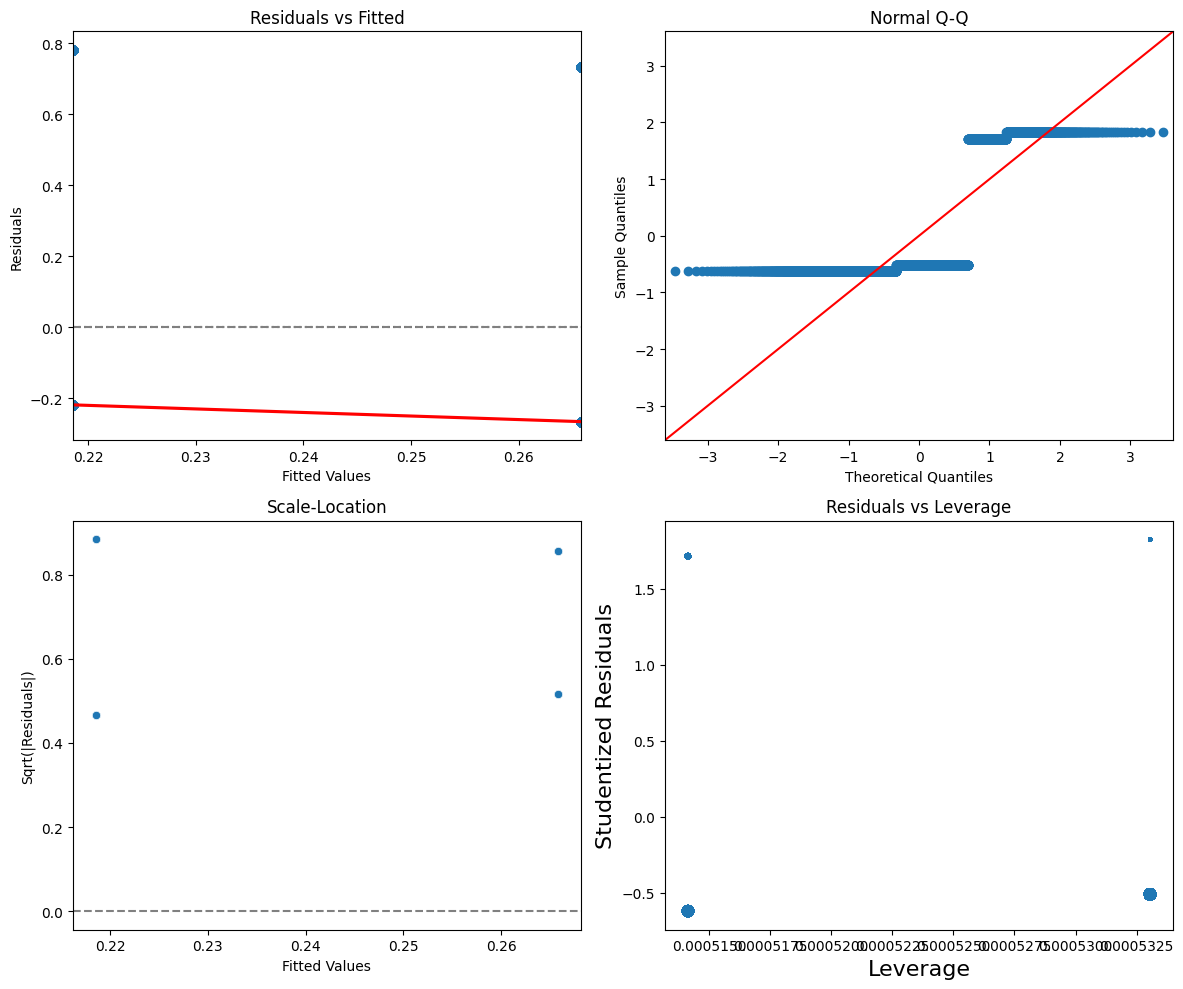

In [ ]:
# Residual Plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
sns.residplot(x=model1.fittedvalues, y=model1.resid, lowess=True, line_kws={'color': 'red'}, ax=ax[0, 0])
ax[0, 0].axhline(0, color='gray', linestyle='--')
ax[0, 0].set_title("Residuals vs Fitted")
ax[0, 0].set_xlabel("Fitted Values")
ax[0, 0].set_ylabel("Residuals")

# Normal Q-Q
sm.qqplot(model1.resid, line="45", fit=True, ax=ax[0, 1])
ax[0, 1].set_title("Normal Q-Q")

# Scale-Location (Spread-Location)
abs_resid = abs(model1.resid)**0.5
sns.scatterplot(x=model1.fittedvalues, y=abs_resid, ax=ax[1, 0])
ax[1, 0].axhline(0, color='gray', linestyle='--')
ax[1, 0].set_title("Scale-Location")
ax[1, 0].set_xlabel("Fitted Values")
ax[1, 0].set_ylabel("Sqrt(|Residuals|)")

# Residuals vs Leverage
sm.graphics.influence_plot(model1, criterion="cooks", size=2, ax=ax[1, 1])
ax[1, 1].set_title("Residuals vs Leverage")

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

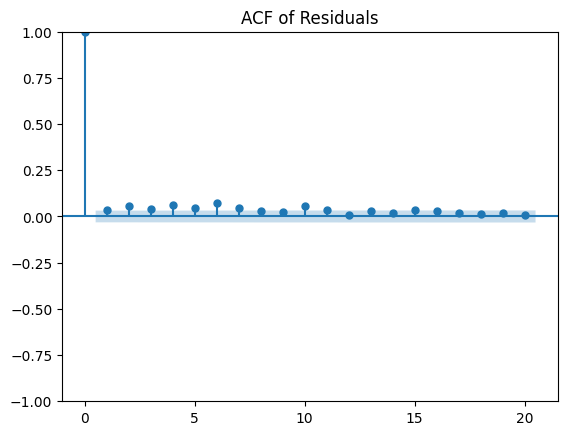

In [ ]:
# Plot the autocorrelation function (ACF) of residuals
plt.figure(figsize=(8, 6))
plot_acf(model1.resid, lags=20, alpha=0.05, title="ACF of Residuals")
plt.show()

In [ ]:
from scipy.stats import pearsonr

#correlation between observables and residuals

# Observables and residuals
observables = data_subset['zakaibag']
residuals = model1.resid

# Calculate Pearson correlation
correlation, p_value = pearsonr(observables, residuals)

# Display the results
print("Correlation between observables and residuals:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

Correlation between observables and residuals:
Correlation coefficient: 0.9985
P-Value: 0.0000


# School covariates, quartile dumies, micro covariates, see Table - 2  

In [ ]:
import re

 # covariates

# Extract covariates that start with "_Ip" in column names
ip = [col for col in data.columns if re.match(r"^_Ip", col)]

# Define additional covariates
additional_covariates = ["treated", "semarab", "semrel", "ls50", "ls75", "ls100", "educav", "educem", "ah4", "ole5"]

# Combine all covariates
covar = additional_covariates + ip

# Create the formula dynamically
fm2 = f"zakaibag ~ {' + '.join(covar)}"

print("Formula for regression:")
print(fm2)


Formula for regression:
zakaibag ~ treated + semarab + semrel + ls50 + ls75 + ls100 + educav + educem + ah4 + ole5 + _Ipair_2 + _Ipair_3 + _Ipair_4 + _Ipair_5 + _Ipair_7 + _Ipair_8 + _Ipair_9 + _Ipair_10 + _Ipair_11 + _Ipair_12 + _Ipair_13 + _Ipair_14 + _Ipair_15 + _Ipair_16 + _Ipair_17 + _Ipair_18 + _Ipair_19 + _Ipair_20


In [ ]:
# Fit the regression model using formula `fm2`
model2 = smf.ols(fm2, data=data_subset).fit()

# Display the summary of the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               zakaibag   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     56.52
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          5.44e-262
Time:                        21:30:26   Log-Likelihood:                -1518.6
No. Observations:                3821   AIC:                             3095.
Df Residuals:                    3792   BIC:                             3276.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2814      0.036     -7.869      0.0

In [ ]:
from scipy.stats import spearmanr

data_cor = data[data['panel'] == 1].copy()

# Add residuals from model2 to the DataFrame
data_cor['residuals'] = model2.resid

# Select columns for correlation analysis
columns_to_correlate = [
    "zakaibag", "treated", "semarab", "semrel", "ls50",
    "ls75", "ls100", "educav", "educem", "ah4", "ole5"
]

# Compute the Spearman correlation matrix
spearman_corr = data_cor[columns_to_correlate].corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(spearman_corr)

# Perform a Spearman correlation test between `treated` and `lagscore`
treated = data_cor['treated']
lagscore = data_cor['lagscore']
correlation, p_value = spearmanr(treated, lagscore)

# Display the test results
print("\nSpearman Correlation Test:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

Spearman Correlation Matrix:
          zakaibag   treated   semarab    semrel      ls50      ls75  \
zakaibag  1.000000  0.055116  0.061947  0.059777 -0.204205  0.130387   
treated   0.055116  1.000000 -0.035177 -0.081957  0.020072  0.032189   
semarab   0.061947 -0.035177  1.000000 -0.263598 -0.049995  0.003427   
semrel    0.059777 -0.081957 -0.263598  1.000000 -0.080419 -0.051980   
ls50     -0.204205  0.020072 -0.049995 -0.080419  1.000000 -0.332950   
ls75      0.130387  0.032189  0.003427 -0.051980 -0.332950  1.000000   
ls100     0.391487 -0.018294  0.004934  0.018541 -0.330188 -0.336943   
educav    0.098137  0.040674 -0.463997  0.202546 -0.006126 -0.001668   
educem    0.072025  0.071372 -0.593340  0.168941  0.003294 -0.001706   
ah4       0.001099  0.016416  0.602370  0.026295 -0.022872 -0.025327   
ole5      0.007622 -0.121623 -0.190424  0.389789 -0.099057 -0.087814   

             ls100    educav    educem       ah4      ole5  
zakaibag  0.391487  0.098137  0.072025  0.001

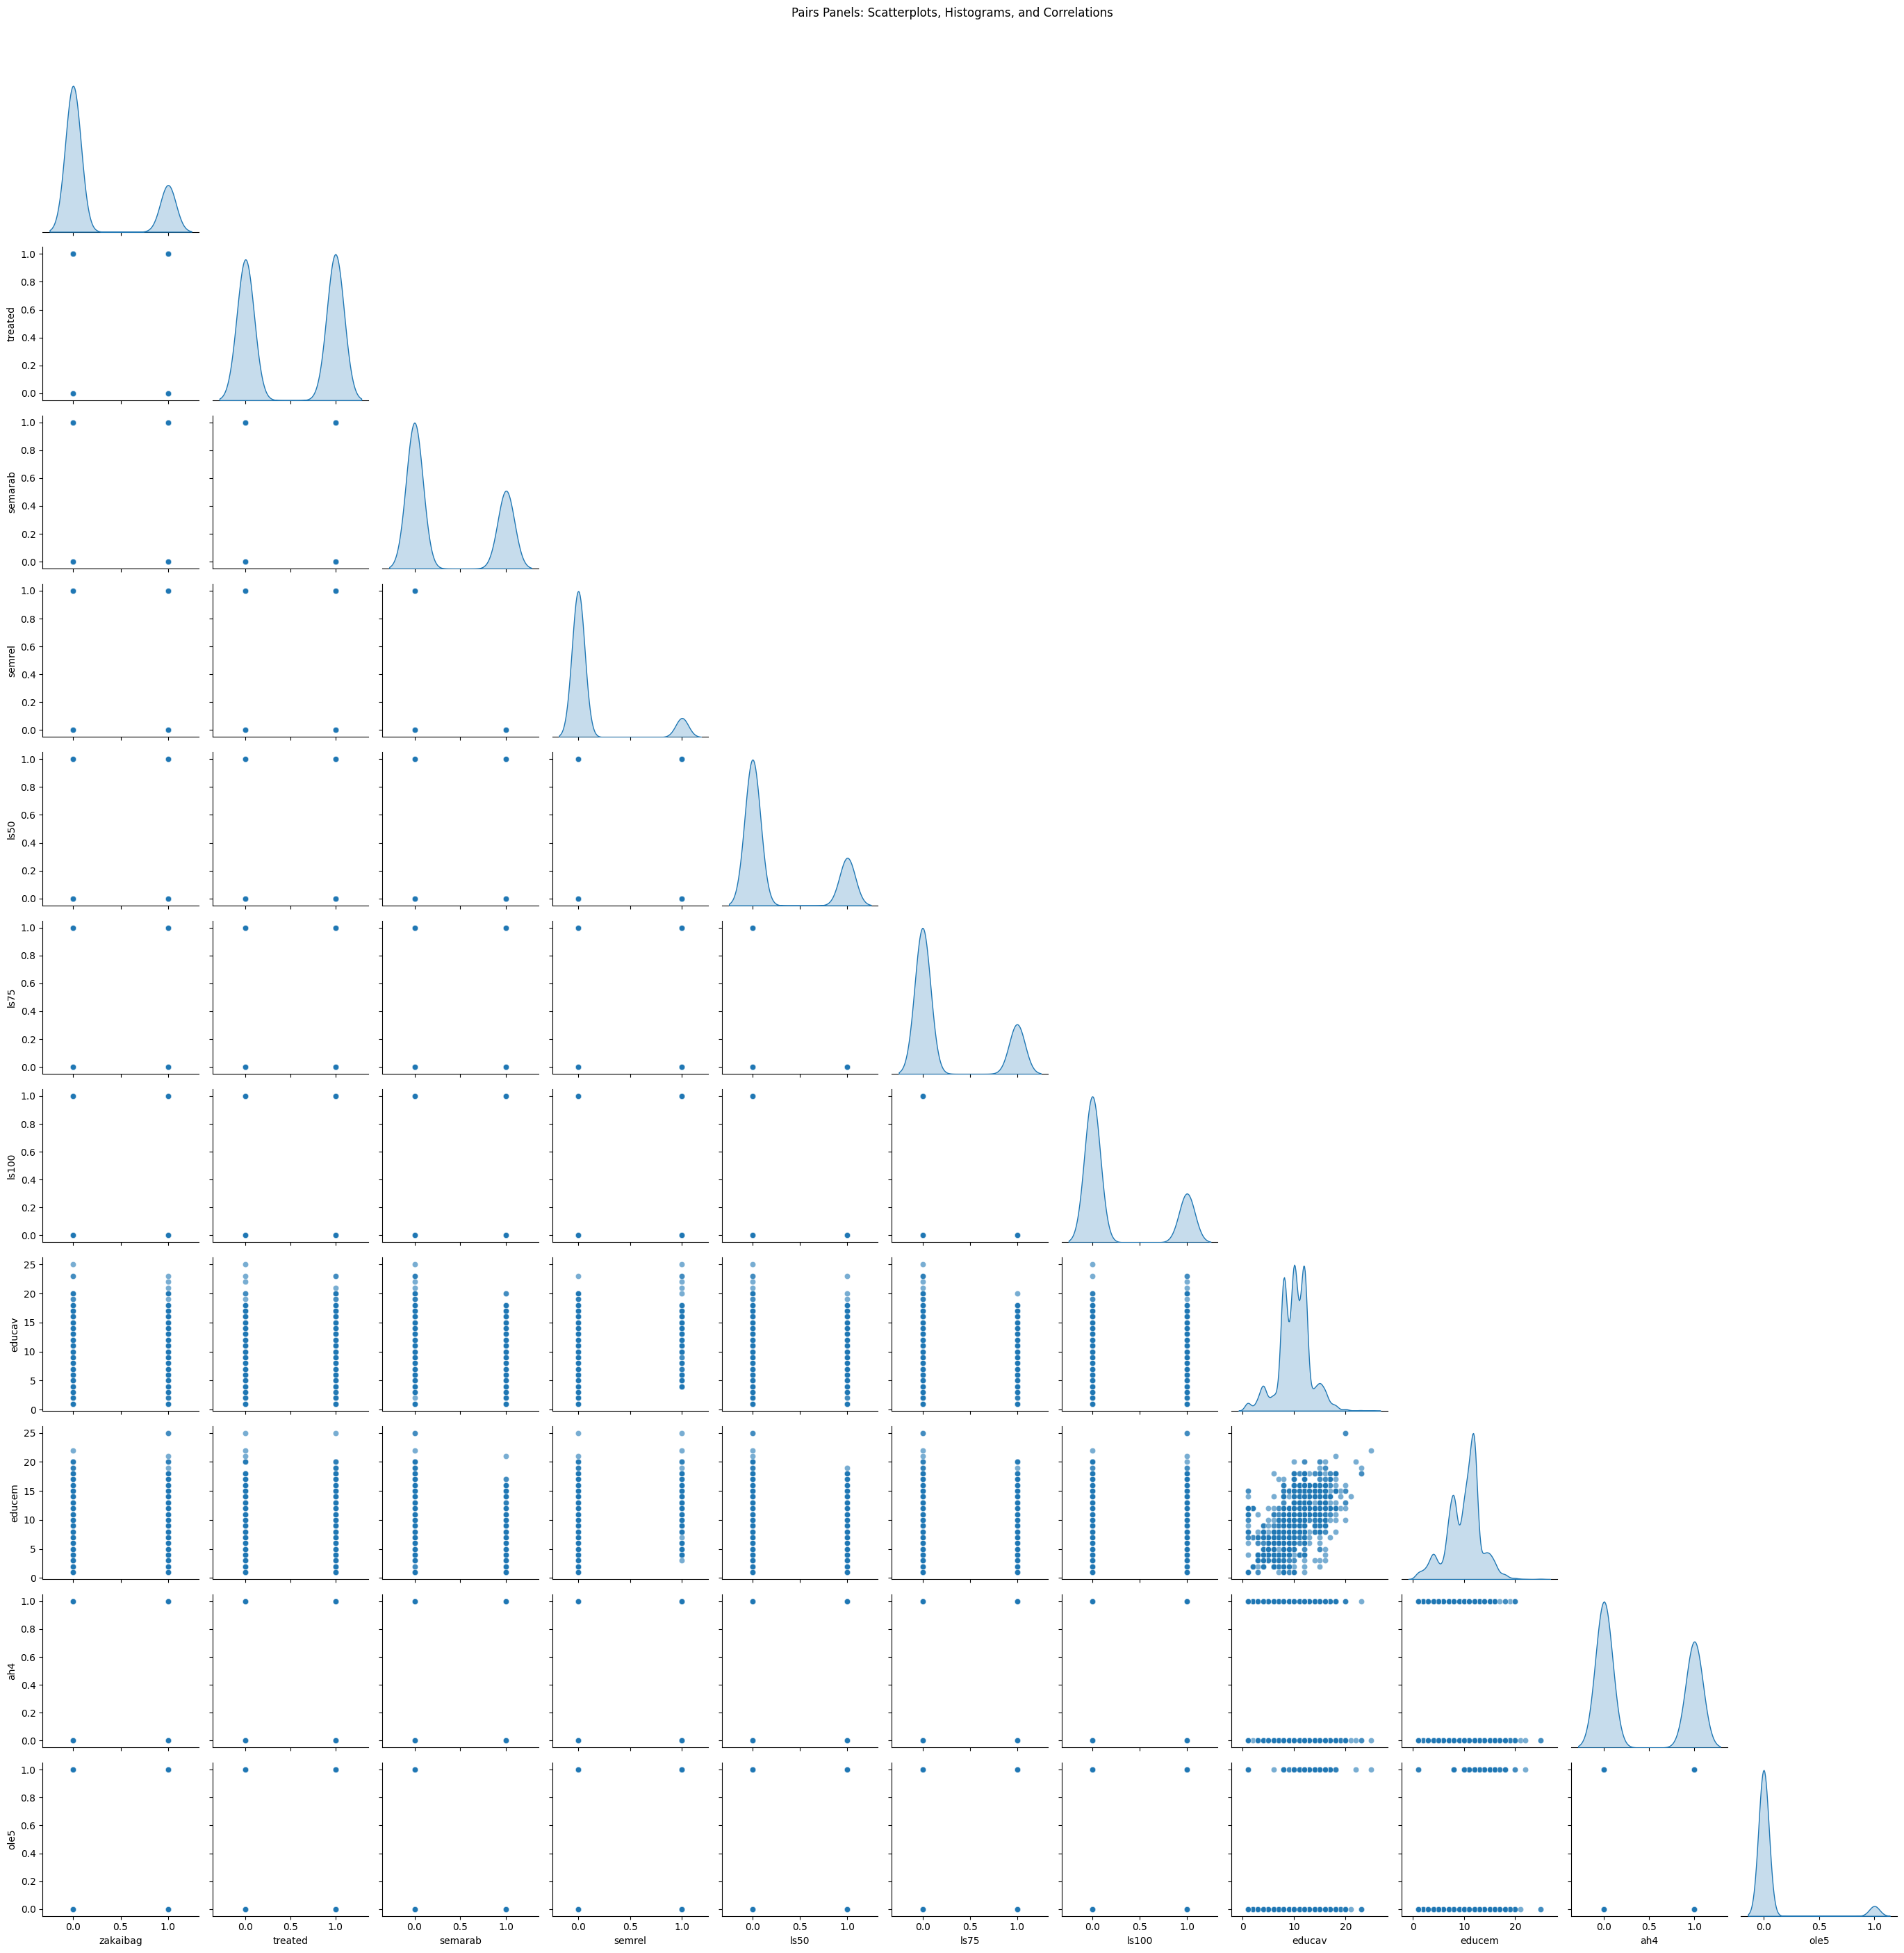

In [ ]:
# Select columns for the pairs plot
columns_to_plot = ["zakaibag", "treated", "semarab", "semrel", "ls50","ls75", "ls100", "educav", "educem", "ah4", "ole5"]

# Subset the data
data_subset = data_cor[columns_to_plot]

# Create the pairs plot
sns.pairplot(
    data_subset,
    diag_kind="kde",  # Kernel density estimate for histograms
    corner=True,      # Display only the lower triangle of plots
    plot_kws={'alpha': 0.6}  # Transparency for scatter plots
)

# Adjust the layout and display the plot
plt.suptitle("Pairs Panels: Scatterplots, Histograms, and Correlations", y=1.02)
plt.tight_layout()
plt.show()

Finally we can use diffent statistics to know how good our model is:

AIC	Lower the better; The Akaike’s information criterion - AIC (Akaike, 1974)

BIC	Lower the better; Bayesian information criterion - BIC (Schwarz, 1978)

both measure of the goodness of fit of an estimated statistical model and can also be used for model selection. Both criteria depend on the maximized value of the likelihood function L for the estimated model.
For model comparison, the model with the lowest AIC and BIC score is preferred.

In [ ]:
# AIC and BIC for model1
aic_model1 = model1.aic
bic_model1 = model1.bic

print(f"AIC for model1: {aic_model1:.4f}")
print(f"BIC for model1: {bic_model1:.4f}")

# AIC and BIC for model2
aic_model2 = model2.aic
bic_model2 = model2.bic

print(f"AIC for model2: {aic_model2:.4f}")
print(f"BIC for model2: {bic_model2:.4f}")


AIC for model1: 4362.4170
BIC for model1: 4374.9135
AIC for model2: 3095.2892
BIC for model2: 3276.4889


In [ ]:
from statsmodels.iolib.summary2 import summary_col

# Define subsets
data_subset = data[data['panel'] == 1]

# Model 1
model1 = smf.ols('zakaibag ~ treated + semarab + semrel', data=data_subset).fit()

# Model 2
model2 = smf.ols('zakaibag ~ treated + semarab + semrel + ls50 + ls75 + ls100 + educav + educem + ah4 + ole5', data=data_subset).fit()

# Model 3
ip_vars = [col for col in data.columns if col.startswith('_Ip')]
model3_formula = f"zakaibag ~ treated + semarab + semrel + {' + '.join(ip_vars)}"
model3 = smf.ols(model3_formula, data=data_subset).fit()

# Model 4
covar_vars = ["treated", "semarab", "semrel", "ls50", "ls75", "ls100", "educav", "educem", "ah4", "ole5"] + ip_vars
model4_formula = f"zakaibag ~ {' + '.join(covar_vars)}"
model4 = smf.ols(model4_formula, data=data_subset).fit()

# Generate summary table
results_table = summary_col(
    [model1, model2, model3, model4],
    stars=True,
    model_names=["Model 1", "Model 2", "Model 3", "Model 4"],
    info_dict={
        'R-squared': lambda x: f"{x.rsquared:.4f}",
        'No. Observations': lambda x: f"{int(x.nobs)}"
    }
)

print(results_table)



                  Model 1   Model 2    Model 3   Model 4  
----------------------------------------------------------
Intercept        0.1730*** -0.1928*** -0.0840** -0.2814***
                 (0.0121)  (0.0307)   (0.0329)  (0.0358)  
treated          0.0561*** 0.0524***  0.0523*** 0.0675*** 
                 (0.0138)  (0.0122)   (0.0147)  (0.0131)  
semarab          0.0787*** 0.1376***  0.1311*** 0.1722*** 
                 (0.0150)  (0.0184)   (0.0193)  (0.0217)  
semrel           0.1184*** 0.1406***  0.2041*** 0.2057*** 
                 (0.0225)  (0.0217)   (0.0256)  (0.0244)  
ls50                       0.1001***            0.0934*** 
                           (0.0174)             (0.0176)  
ls75                       0.3397***            0.3284*** 
                           (0.0172)             (0.0175)  
ls100                      0.5217***            0.5115*** 
                           (0.0173)             (0.0177)  
educav                     0.0058**             0.0038 

In [ ]:
# AIC values for all models
aic_values = [model1.aic, model2.aic, model3.aic, model4.aic]

# BIC values for all models
bic_values = [model1.bic, model2.bic, model3.bic, model4.bic]

criteria_df = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "AIC": aic_values,
    "BIC": bic_values
})
criteria_df

,Model,AIC,BIC
0,Model 1,4323.012654,4348.005723
1,Model 2,3252.386115,3321.117057
2,Model 3,4081.324449,4218.786333
3,Model 4,3095.289153,3276.488909


# Back to hypothesis testing

In [ ]:
# load the `CASchools` dataset
caschools = pd.read_csv('../data/CASchools.csv')
caschools.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


In [ ]:
# add student-teacher ratio
caschools['STR'] = caschools['students'] / caschools['teachers']

In [ ]:
# add average test-score
caschools['score'] = (caschools['read'] + caschools['math']) / 2

In [ ]:
# estimate the model
linear_model = smf.ols('score ~ STR', data=caschools).fit()

In [ ]:
# print the summary of the coefficients to the console
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.78e-06
Time:                        21:30:31   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9329      9.467     73.825      0.0

Note that summary() does not perform the normal approximation but calculates values using the t distribution instead. Generally, the degrees of freedom of the assumed distribution are determined in the following manner: DF = n-(number of covariates)-1

In [ ]:
# determine residual degrees of freedom
residual_df = linear_model.df_resid

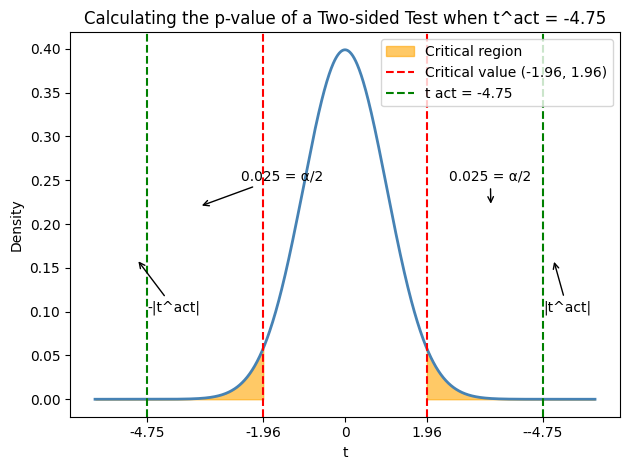

In [ ]:
from scipy.stats import norm

# Define the range of t-values
t = np.linspace(-6, 6, 1000)

# Define t_act
tact = -4.75

# Plot the standard normal distribution
plt.plot(t, norm.pdf(t, 0, 1), color="steelblue", lw=2)
plt.title("Calculating the p-value of a Two-sided Test when t^act = -4.75", fontsize=12)
plt.xlabel("t")
plt.ylabel("Density")

# Highlight critical regions
# Left tail
plt.fill_between(t, 0, norm.pdf(t, 0, 1), where=(t <= -1.96), color="orange", alpha=0.6, label="Critical region")
# Right tail
plt.fill_between(t, 0, norm.pdf(t, 0, 1), where=(t >= 1.96), color="orange", alpha=0.6)

# Add vertical lines for critical values and tact
plt.axvline(-1.96, color="red", linestyle="--", label="Critical value (-1.96, 1.96)")
plt.axvline(1.96, color="red", linestyle="--")
plt.axvline(tact, color="green", linestyle="--", label="t act = -4.75")
plt.axvline(-tact, color="green", linestyle="--")

# Add annotations for arrows
plt.annotate("0.025 = α/2", xy=(-3.5, 0.22), xytext=(-2.5, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate("0.025 = α/2", xy=(3.5, 0.22), xytext=(2.5, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate("-|t^act|", xy=(-5, 0.16), xytext=(-4.75, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)
plt.annotate("|t^act|", xy=(5, 0.16), xytext=(4.75, 0.1),
             arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10)

# Add ticks for critical values and tact
plt.xticks([0, -1.96, 1.96, -tact, tact], ['0', '-1.96', '1.96', f'-{tact}', f'{tact}'])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


To get a better understanding of confidence intervals we conduct another simulation study.

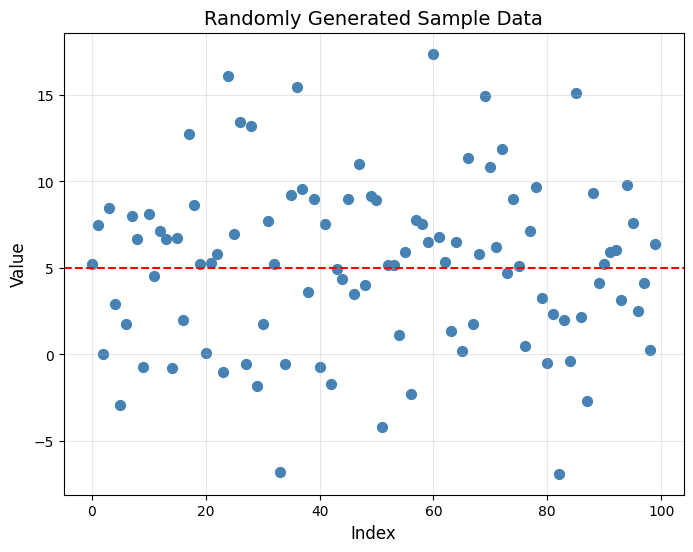

In [ ]:
# Set seed for reproducibility
np.random.seed(4)

Y = np.random.normal(loc=5, scale=5, size=100)  # n=100, mean=5, sd=5

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(range(len(Y)), Y, color="steelblue", s=50, label="Sample Data")
plt.title("Randomly Generated Sample Data", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.axhline(y=5, color="red", linestyle="--", label="Mean = 5")  # Reference mean line

plt.grid(alpha=0.3)
plt.show()

In [ ]:
#we can compute this interval in R by hand.

mean_Y = np.mean(Y)

print(mean_Y)

# Compute the confidence interval
CI_lower = mean_Y - 1.96 * 5 / 10  # 1.96 corresponds to 95% confidence level
CI_upper = mean_Y + 1.96 * 5 / 10

# Combine results into a dictionary for display
CI = {"CIlower": CI_lower, "CIupper": CI_upper}

# Print the confidence interval
print(CI)

5.176367889869417
{'CIlower': np.float64(4.196367889869417), 'CIupper': np.float64(6.156367889869418)}


Knowing that mu=5 we see that, for our example data, the confidence interval covers true value.


In [ ]:
# Initialize vectors for lower and upper confidence interval boundaries
n_iterations = 10000
lower = np.zeros(n_iterations)
upper = np.zeros(n_iterations)

# Loop for sampling, estimation, and confidence interval calculation
np.random.seed(4)  # Set seed for reproducibility
for i in range(n_iterations):
    Y = np.random.normal(loc=5, scale=5, size=100)  # Generate random sample
    mean_Y = np.mean(Y)
    lower[i] = mean_Y - 1.96 * 5 / 10  # Lower bound of CI
    upper[i] = mean_Y + 1.96 * 5 / 10  # Upper bound of CI

In [ ]:
# join vectors of interval bounds in a matrix
CIs = np.column_stack((lower, upper))

we see that not in all cases this is true

In [ ]:
# identify intervals not covering mu
ID = np.where(~((CIs[:100, 0] <= 5) & (5 <= CIs[:100, 1])))[0]

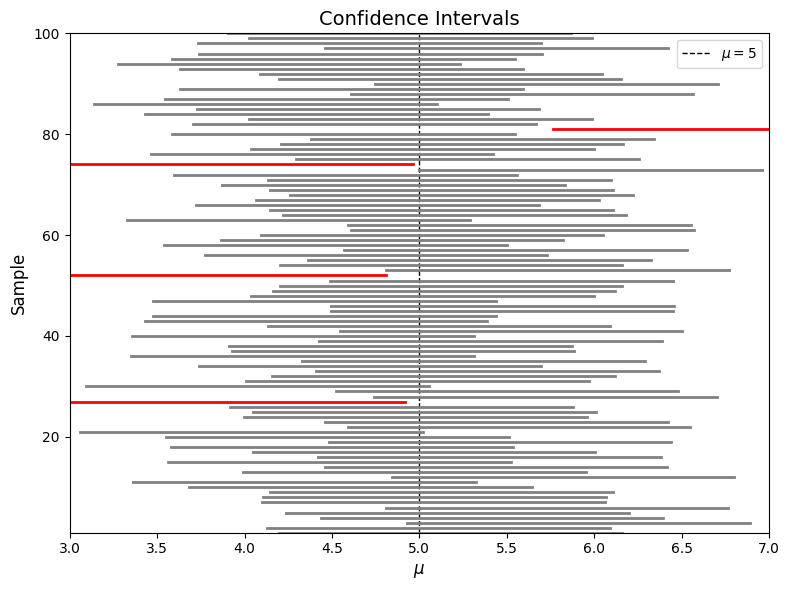

In [ ]:
# Initialize the plot
plt.figure(figsize=(8, 6))
plt.title("Confidence Intervals", fontsize=14)
plt.xlabel(r"$\mu$", fontsize=12)
plt.ylabel("Sample", fontsize=12)
plt.xlim(3, 7)
plt.ylim(1, 100)

# Set up the color vector
colors = ["gray"] * 100
for idx in ID:
    colors[idx] = "red"

# Draw the reference line at mu = 5
plt.axvline(x=5, color="black", linestyle="--", linewidth=1, label=r"$\mu=5$")

# Add horizontal bars representing the CIs
for j in range(100):
    plt.plot([CIs[j, 0], CIs[j, 1]], [j + 1, j + 1], color=colors[j], linewidth=2)

# Add legend
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# compute 95% confidence interval for coefficients in 'linear_model'

confidence_intervals = linear_model.conf_int(alpha=0.05)

# Add column names for clarity
confidence_intervals.columns = ["Lower Bound", "Upper Bound"]
confidence_intervals

,Lower Bound,Upper Bound
Intercept,680.323124,717.542775
STR,-3.222980,-1.336636


In [ ]:
from scipy.stats import t

# compute 95% confidence interval for coefficients in 'linear_model' by hand

# Extract the coefficient, standard error, and degrees of freedom for the second predictor
coef = linear_model.params[1]  # Coefficient for the second predictor
std_error = linear_model.bse[1]  # Standard error for the second predictor
df_residuals = linear_model.df_resid  # Residual degrees of freedom

# Compute the critical t-value for 95% confidence
t_crit = t.ppf(0.975, df_residuals)  # Two-tailed test, alpha=0.05

# Compute the confidence interval
ci_lower = coef - t_crit * std_error
ci_upper = coef + t_crit * std_error

# Display the confidence interval
print({"lower": ci_lower, "upper": ci_upper})

{'lower': np.float64(-3.2229798510407077), 'upper': np.float64(-1.3366364292486805)}


C:\Users\fuent\AppData\Local\Temp\ipykernel_13244\3918826953.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coef = linear_model.params[1]  # Coefficient for the second predictor
C:\Users\fuent\AppData\Local\Temp\ipykernel_13244\3918826953.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std_error = linear_model.bse[1]  # Standard error for the second predictor
